(256, 256)
(256, 256)


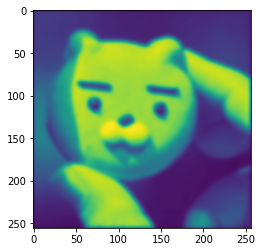

In [2]:
import numpy as np
import scipy.io
from PIL import Image
import time
from matplotlib import image
from matplotlib import pyplot as plt
from scipy.linalg import lu_factor, lu_solve
from sklearn.datasets import load_wine


def image_process(L):
    im = Image.open(L) 
    newimg = np.array(im)
    im = im.convert('L')
    img = np.array(im)
    img = img.astype(np.float64) / 256
    return img

        
def toeplitz(i,T,img):
    t = []
    for k in range(T.shape[1]):
        T[i,k] = 1/5.6*np.exp(-0.1*(i-k)**2)
    return T


L = "D:\\My Code\\codes\\test_images\\256_256_hand.png"

img = image_process(L)

T = np.zeros([img.shape[0],img.shape[1]])

for i in range(img.shape[0]):
    T = toeplitz(i,T,img)

B = T @ img @ T.T

plt.imshow(B)
plt.show()


In [3]:
import numpy as np
# This program is to transform A into bidiagonal form utilizing householder

def householder(b_r,length): # b is a vector that we want to only preserve b1, length is the longtitude of b_r
    beta = np.linalg.norm(b_r)
    v = np.array([0.0 for i in range(length)])
    if (b_r[1:]==0).all():
        return np.identity(length), b_r[0]
    v[0] = (np.abs(b_r[0])+beta)*np.sign(b_r[0])
    v[1:] = b_r[1:]
    H = np.identity(length)-(2/(np.inner(v,v)))*np.outer(v,v.T)
    #print(H@b_r)
    return H,-1*np.sign(b_r[0])*beta  #np.identity(length)-(2/(np.linalg.norm(b_r)**2))*np.outer(b_r,b_r)

def Bidiagonalization(A):
    row,col=np.shape(A)
    diff = row-col #find shape
    H_all_U = np.identity(row)
    H_all_V = np.identity(col)
    if diff >= -1 :
        for i in range(col-2):
            H1 = np.identity(row)
            H2 = np.identity(col)
            H_U, entry_u = householder(A[i:,i],row-i) #gen U
            A[i,i] = entry_u
            A[i+1:,i] = 0
            A[i:,i+1:] = np.matmul(H_U,A[i:,i+1:]) #update A utilizing U  列+1
            H1[i:,i:] = H_U
            H_all_U = H1@H_all_U
            #print(np.round(A,4))
            H_V, entry_v = householder(A[i,i+1:],col-i-1) # gen V
            A[i,i+1] = entry_v
            A[i,i+2:] = 0
            A[i+1:,i+1:] = A[i+1:,i+1:]@H_V #行-1
            H2[i+1:,i+1:] = H_V
            H_all_V = H_all_V@H2
            #print(np.round(A,4))
        if diff == -1:
            return A,H_all_U,H_all_V
        elif diff == 0:
            H1 = np.identity(row)
            H_U, entry_u = householder(A[row-2:,col-2],2)
            A[row-2,row-2] = entry_u
            A[row-1,row-2] = 0.0
            A[row-2:,row-1:] = H_U@A[row-2:,row-1:] #lie-1
            H1[row-2:,row-2:] = H_U
            H_all_U = H1@H_all_U
            return A,H_all_U,H_all_V
        else:
            H1 = np.identity(row)
            H_U, entry_u = householder(A[col-2:,col-2],diff+2)
            A[col-2,col-2] = entry_u
            A[col-1:,col-2] = 0.0
            #print(A)
            #print(A[col-1:,col-1],H_U)
            A[col-2:,col-1:] = H_U@A[col-2:,col-1:] #lie-1
            H1[col-2:,col-2:] = H_U
            H_all_U = H1@H_all_U
            H1 = np.identity(row)
            H_U, entry_u = householder(A[col-1:,col-1],diff+1)
            A[col-1,col-1] = entry_u
            A[col:,col-1] = 0.0
            A[col-1:,col] = H_U@A[col-1:,col] #lie-1
            H1[col-1:,col-1:] = H_U
            H_all_U = H1@H_all_U
            return A,H_all_U,H_all_V
    else:
        for i in range(row-1):
            H1 = np.identity(row)
            H2 = np.identity(col)
            H_U, entry_u = householder(A[i:,i],row-i) #gen U
            A[i,i] = entry_u
            A[i+1:,i] = 0
            A[i:,i+1:] = np.matmul(H_U,A[i:,i+1:]) #update A utilizing U  列-1
            #print(np.round(A,4))
            H1[i:,i:] = H_U
            H_all_U = H1@H_all_U
            H_V, entry_v = householder(A[i,i+1:],col-i-1) # gen V
            A[i,i+1] = entry_v
            A[i,i+2:] = 0
            A[i+1:,i+1:] = A[i+1:,i+1:]@H_V #行-1
            #print(np.round(A,4))
            H2[i+1:,i+1:] = H_V
            H_all_V = H_all_V@H2
        H2 = np.identity(col)
        H_V, entry_v = householder(A[row-1,row:],2)
        A[row-1,row:] = A[row-1,row:]@H_V
        H2[col-2:,col-2:] = H_V
        H_all_V = H_all_V@H2
        return A,H_all_U,H_all_V #return result, U,V(no need to do the transpose)

#A=np.random.rand(512,512)
'''
A = np.array([
    [1.0,3.0,2.5],
    [2.3,4.5,2.5],
    [2.4,2.5,2.6]
])
'''
#B = np.array(A)
#print(B)
#result,U,V = Bidiagonalization(A)
#print(np.round(result,4))
#print(np.round(U.T@result@V.T,5))

'\nA = np.array([\n    [1.0,3.0,2.5],\n    [2.3,4.5,2.5],\n    [2.4,2.5,2.6]\n])\n'

In [4]:
import numpy as np
# from Prob1_1 import Bidiagonalization
import time
#This program is to implement a alternative QR iteration
'''
A=np.array([
    [10.0,-52.3,-3.2],
    [-10.0,6.0,-2.0],
    [2.1,2.0,-4.0]
])
'''
A = np.random.rand(216,216)
#print(np.linalg.matrix_rank(A))
#print(A)
#print(np.linalg.svd(A)[1])

def special_cholesky(R,length): # R is tridagonal and symmetric, use accelarated method
    d = R.diagonal(0)
    a = R.diagonal(1)
    f = [np.sqrt(d[0])]
    b = []
    for k in range(1,length):
        l = a[k-1]/f[k-1]
        b.append(l)
        f.append (np.sqrt(d[k]-l**2))
    return f,b
    
def iter_in_each_row(B,length,type):
    Q_sum = np.identity(length)
    while np.abs(B[length-2,length-1]) >= 1e-12: #accelerated convergence. could use:(np.abs(B.diagonal(1)) >= 1e-12).any()  
        Q,R = np.linalg.qr(B.T, mode='complete')
        Q_sum = Q_sum@Q
        if type == 'special':
            dia,super_dia = special_cholesky(R@R.T,length)
            B = np.diag(dia)
            B[:length-1,1:length] += np.diag(super_dia)
        #print(R)
        #print(R@R.T)
        else:
            B = np.linalg.cholesky(R@R.T).T #use common Cholesky decomposition
    return B[:length-1,:length-1], B[length-1,length-1],Q_sum  #B, Q_sum 
        
def QR_iteration(B,U,V,type=None):
    C = np.array(B) #copy of B
    length,wid = np.shape(B)
    e_val = []
    next = B
    vector = np.identity(length)
    #'''
    for i in range(length-1):
        Q_store = np.identity(length)
        next,eigen_val,Q_i = iter_in_each_row(next,length-i,type)
        e_val.append(eigen_val)
        Q_store[:length-i,:length-i] = Q_i
        vector = vector@Q_store
    e_val.append(next[0,0])
    #'''
    #e_val,vector = iter_in_each_row(B,length)
    value = np.array(e_val)
    #value = e_val.diagonal(0)
    value = value[::-1]
    #print(value)
    U_B = C@vector@np.diag((1/value)) #calculate decomposition of B
    #print(np.round(U_B.T,1) == np.round(np.linalg.inv(U_B),1))
    #print(U_B@np.diag(np.sqrt(value))@vector.T)
    U_A = U.T@U_B
    V_A = V@vector 
    sig_A = value
    #print(value)
    return U_A,sig_A,V_A

#Implementation
B,U,V = Bidiagonalization(A)
#print(np.linalg.svd(B)[1])
#print(np.round(np.linalg.svd(B)[0].T,1) == np.round(np.linalg.inv(np.linalg.svd(B)[0]),1))
timestart = time.time()
U_A,sig_A,V_A = QR_iteration(B,U,V,'special') # eigenval and vector of BTB
timeend = time.time()
print(timeend-timestart)
timestart = time.time()
U_A,sig_A,V_A = QR_iteration(B,U,V) # eigenval and vector of BTB
timeend = time.time()
print(timeend-timestart)

66.37036204338074
57.57698154449463


1.9536917209625244
[[ 7.00820439  0.62841938 -3.88919877 ...  0.18810537  0.08536901
  -0.20693076]
 [ 0.62841938  1.21632683  0.97206149 ... -0.07759795 -0.03515096
   0.08536901]
 [-3.88919877  0.97206149  3.82128412 ... -0.17099233 -0.07759795
   0.18810537]
 ...
 [ 0.18810537 -0.07759795 -0.17099233 ...  3.82128412  0.97206149
  -3.88919877]
 [ 0.08536901 -0.03515096 -0.07759795 ...  0.97206149  1.21632683
   0.62841938]
 [-0.20693076  0.08536901  0.18810537 ... -3.88919877  0.62841938
   7.00820439]]


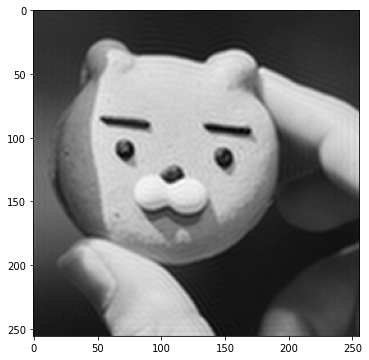

100 100 34.88867736028878 0.2588353157043457
[[ 7.00820439  0.62841938 -3.88919877 ...  0.18810537  0.08536901
  -0.20693076]
 [ 0.62841938  1.21632683  0.97206149 ... -0.07759795 -0.03515096
   0.08536901]
 [-3.88919877  0.97206149  3.82128412 ... -0.17099233 -0.07759795
   0.18810537]
 ...
 [ 0.18810537 -0.07759795 -0.17099233 ...  3.82128412  0.97206149
  -3.88919877]
 [ 0.08536901 -0.03515096 -0.07759795 ...  0.97206149  1.21632683
   0.62841938]
 [-0.20693076  0.08536901  0.18810537 ... -3.88919877  0.62841938
   7.00820439]]


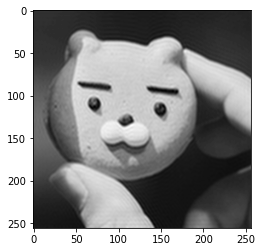

100 120 35.51719700567196 0.2249898910522461
[[ 7.00820439  0.62841938 -3.88919877 ...  0.18810537  0.08536901
  -0.20693076]
 [ 0.62841938  1.21632683  0.97206149 ... -0.07759795 -0.03515096
   0.08536901]
 [-3.88919877  0.97206149  3.82128412 ... -0.17099233 -0.07759795
   0.18810537]
 ...
 [ 0.18810537 -0.07759795 -0.17099233 ...  3.82128412  0.97206149
  -3.88919877]
 [ 0.08536901 -0.03515096 -0.07759795 ...  0.97206149  1.21632683
   0.62841938]
 [-0.20693076  0.08536901  0.18810537 ... -3.88919877  0.62841938
   7.00820439]]


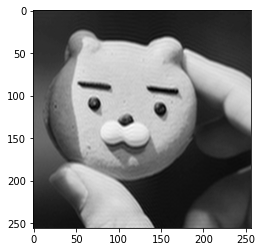

100 150 36.101148701577216 0.21100592613220215
[[ 7.00820439  0.62841938 -3.88919877 ...  0.18810537  0.08536901
  -0.20693076]
 [ 0.62841938  1.21632683  0.97206149 ... -0.07759795 -0.03515096
   0.08536901]
 [-3.88919877  0.97206149  3.82128412 ... -0.17099233 -0.07759795
   0.18810537]
 ...
 [ 0.18810537 -0.07759795 -0.17099233 ...  3.82128412  0.97206149
  -3.88919877]
 [ 0.08536901 -0.03515096 -0.07759795 ...  0.97206149  1.21632683
   0.62841938]
 [-0.20693076  0.08536901  0.18810537 ... -3.88919877  0.62841938
   7.00820439]]


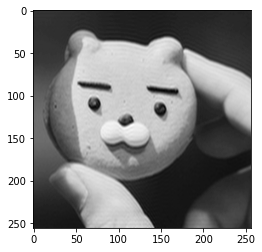

100 175 36.31633220997362 0.21499991416931152
[[ 7.00820439  0.62841938 -3.88919877 ...  0.18810537  0.08536901
  -0.20693076]
 [ 0.62841938  1.21632683  0.97206149 ... -0.07759795 -0.03515096
   0.08536901]
 [-3.88919877  0.97206149  3.82128412 ... -0.17099233 -0.07759795
   0.18810537]
 ...
 [ 0.18810537 -0.07759795 -0.17099233 ...  3.82128412  0.97206149
  -3.88919877]
 [ 0.08536901 -0.03515096 -0.07759795 ...  0.97206149  1.21632683
   0.62841938]
 [-0.20693076  0.08536901  0.18810537 ... -3.88919877  0.62841938
   7.00820439]]


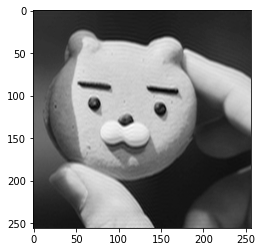

100 200 36.443751766315756 0.21059560775756836
[[ 22.44920639 -12.78433489 -15.50484578 ...   0.33063151   0.77021341
   -0.64313007]
 [-12.78433489  13.61836861  10.65500942 ...  -0.39626613  -0.92212491
    0.77021341]
 [-15.50484578  10.65500942  12.79565208 ...  -0.16965681  -0.39626613
    0.33063151]
 ...
 [  0.33063151  -0.39626613  -0.16965681 ...  12.79565208  10.65500942
  -15.50484578]
 [  0.77021341  -0.92212491  -0.39626613 ...  10.65500942  13.61836861
  -12.78433489]
 [ -0.64313007   0.77021341   0.33063151 ... -15.50484578 -12.78433489
   22.44920639]]


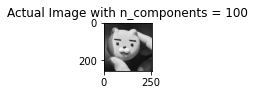

120 100 35.882274535777505 0.13198089599609375
[[ 22.44920639 -12.78433489 -15.50484578 ...   0.33063151   0.77021341
   -0.64313007]
 [-12.78433489  13.61836861  10.65500942 ...  -0.39626613  -0.92212491
    0.77021341]
 [-15.50484578  10.65500942  12.79565208 ...  -0.16965681  -0.39626613
    0.33063151]
 ...
 [  0.33063151  -0.39626613  -0.16965681 ...  12.79565208  10.65500942
  -15.50484578]
 [  0.77021341  -0.92212491  -0.39626613 ...  10.65500942  13.61836861
  -12.78433489]
 [ -0.64313007   0.77021341   0.33063151 ... -15.50484578 -12.78433489
   22.44920639]]


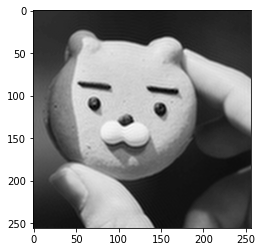

120 120 36.77591160603795 0.27248597145080566
[[ 22.44920639 -12.78433489 -15.50484578 ...   0.33063151   0.77021341
   -0.64313007]
 [-12.78433489  13.61836861  10.65500942 ...  -0.39626613  -0.92212491
    0.77021341]
 [-15.50484578  10.65500942  12.79565208 ...  -0.16965681  -0.39626613
    0.33063151]
 ...
 [  0.33063151  -0.39626613  -0.16965681 ...  12.79565208  10.65500942
  -15.50484578]
 [  0.77021341  -0.92212491  -0.39626613 ...  10.65500942  13.61836861
  -12.78433489]
 [ -0.64313007   0.77021341   0.33063151 ... -15.50484578 -12.78433489
   22.44920639]]


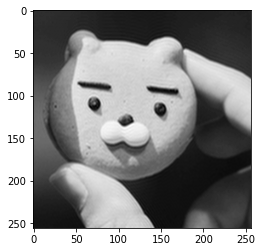

120 150 37.728733900394204 0.23296427726745605
[[ 22.44920639 -12.78433489 -15.50484578 ...   0.33063151   0.77021341
   -0.64313007]
 [-12.78433489  13.61836861  10.65500942 ...  -0.39626613  -0.92212491
    0.77021341]
 [-15.50484578  10.65500942  12.79565208 ...  -0.16965681  -0.39626613
    0.33063151]
 ...
 [  0.33063151  -0.39626613  -0.16965681 ...  12.79565208  10.65500942
  -15.50484578]
 [  0.77021341  -0.92212491  -0.39626613 ...  10.65500942  13.61836861
  -12.78433489]
 [ -0.64313007   0.77021341   0.33063151 ... -15.50484578 -12.78433489
   22.44920639]]


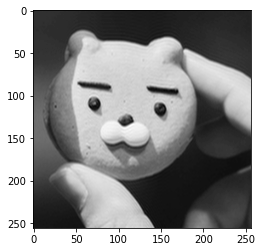

120 175 38.13974305565649 0.23933148384094238
[[ 22.44920639 -12.78433489 -15.50484578 ...   0.33063151   0.77021341
   -0.64313007]
 [-12.78433489  13.61836861  10.65500942 ...  -0.39626613  -0.92212491
    0.77021341]
 [-15.50484578  10.65500942  12.79565208 ...  -0.16965681  -0.39626613
    0.33063151]
 ...
 [  0.33063151  -0.39626613  -0.16965681 ...  12.79565208  10.65500942
  -15.50484578]
 [  0.77021341  -0.92212491  -0.39626613 ...  10.65500942  13.61836861
  -12.78433489]
 [ -0.64313007   0.77021341   0.33063151 ... -15.50484578 -12.78433489
   22.44920639]]


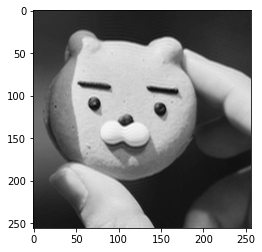

120 200 38.38065493996711 0.21877217292785645
[[ 118.25744241 -207.35730002   74.92817    ...   -6.78515501
     7.96974923   -3.12959889]
 [-207.35730002  421.76207293 -200.03735998 ...   17.27389412
   -20.29381548    7.96974924]
 [  74.92817    -200.03735998  155.13692651 ...  -14.6961746
    17.27389417   -6.78515504]
 ...
 [  -6.78515495   17.27389398  -14.69617448 ...  155.13692587
  -200.03735956   74.9281699 ]
 [   7.96974917  -20.29381532   17.27389404 ... -200.03735956
   421.76207316 -207.35730025]
 [  -3.12959887    7.96974918   -6.78515498 ...   74.9281699
  -207.35730025  118.25744257]]


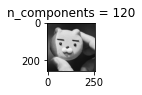

150 100 36.891041269063045 0.14910292625427246
[[ 118.25744241 -207.35730002   74.92817    ...   -6.78515501
     7.96974923   -3.12959889]
 [-207.35730002  421.76207293 -200.03735998 ...   17.27389412
   -20.29381548    7.96974924]
 [  74.92817    -200.03735998  155.13692651 ...  -14.6961746
    17.27389417   -6.78515504]
 ...
 [  -6.78515495   17.27389398  -14.69617448 ...  155.13692587
  -200.03735956   74.9281699 ]
 [   7.96974917  -20.29381532   17.27389404 ... -200.03735956
   421.76207316 -207.35730025]
 [  -3.12959887    7.96974918   -6.78515498 ...   74.9281699
  -207.35730025  118.25744257]]


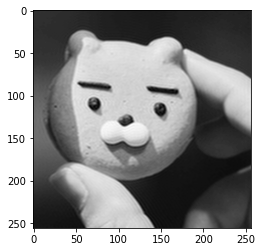

150 120 38.16411451412936 0.21499133110046387
[[ 118.25744241 -207.35730002   74.92817    ...   -6.78515501
     7.96974923   -3.12959889]
 [-207.35730002  421.76207293 -200.03735998 ...   17.27389412
   -20.29381548    7.96974924]
 [  74.92817    -200.03735998  155.13692651 ...  -14.6961746
    17.27389417   -6.78515504]
 ...
 [  -6.78515495   17.27389398  -14.69617448 ...  155.13692587
  -200.03735956   74.9281699 ]
 [   7.96974917  -20.29381532   17.27389404 ... -200.03735956
   421.76207316 -207.35730025]
 [  -3.12959887    7.96974918   -6.78515498 ...   74.9281699
  -207.35730025  118.25744257]]


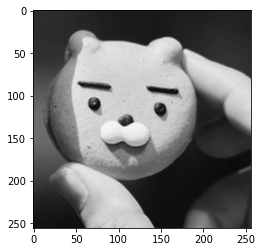

150 150 39.747255732658935 0.23999762535095215
[[ 118.25744241 -207.35730002   74.92817    ...   -6.78515501
     7.96974923   -3.12959889]
 [-207.35730002  421.76207293 -200.03735998 ...   17.27389412
   -20.29381548    7.96974924]
 [  74.92817    -200.03735998  155.13692651 ...  -14.6961746
    17.27389417   -6.78515504]
 ...
 [  -6.78515495   17.27389398  -14.69617448 ...  155.13692587
  -200.03735956   74.9281699 ]
 [   7.96974917  -20.29381532   17.27389404 ... -200.03735956
   421.76207316 -207.35730025]
 [  -3.12959887    7.96974918   -6.78515498 ...   74.9281699
  -207.35730025  118.25744257]]


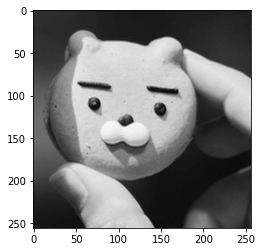

150 175 40.61063298531128 0.22075915336608887
[[ 118.25744241 -207.35730002   74.92817    ...   -6.78515501
     7.96974923   -3.12959889]
 [-207.35730002  421.76207293 -200.03735998 ...   17.27389412
   -20.29381548    7.96974924]
 [  74.92817    -200.03735998  155.13692651 ...  -14.6961746
    17.27389417   -6.78515504]
 ...
 [  -6.78515495   17.27389398  -14.69617448 ...  155.13692587
  -200.03735956   74.9281699 ]
 [   7.96974917  -20.29381532   17.27389404 ... -200.03735956
   421.76207316 -207.35730025]
 [  -3.12959887    7.96974918   -6.78515498 ...   74.9281699
  -207.35730025  118.25744257]]


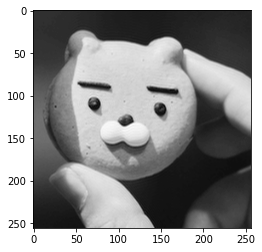

150 200 41.18660351840365 0.2310037612915039
[[  411.9881712  -1159.66260244  1416.20651973 ...    61.75102144
    -35.56687081     9.56115058]
 [-1159.66260241  3540.71046471 -4665.54964119 ...  -229.68757738
    132.30143902   -35.56687132]
 [ 1416.20651965 -4665.54964107  6715.61562208 ...   398.72284589
   -229.68758243    61.75102369]
 ...
 [   61.75101225  -229.68754324   398.72278674 ...  6715.61575276
  -4665.54977562  1416.20656741]
 [  -35.5668655    132.30141932  -229.68754829 ... -4665.54977549
   3540.71058496 -1159.66264331]
 [    9.56114915   -35.56686601    61.7510145  ...  1416.20656734
  -1159.66264329   411.9881849 ]]


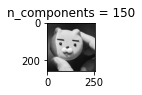

175 100 37.36356040292427 0.13199996948242188
[[  411.9881712  -1159.66260244  1416.20651973 ...    61.75102144
    -35.56687081     9.56115058]
 [-1159.66260241  3540.71046471 -4665.54964119 ...  -229.68757738
    132.30143902   -35.56687132]
 [ 1416.20651965 -4665.54964107  6715.61562208 ...   398.72284589
   -229.68758243    61.75102369]
 ...
 [   61.75101225  -229.68754324   398.72278674 ...  6715.61575276
  -4665.54977562  1416.20656741]
 [  -35.5668655    132.30141932  -229.68754829 ... -4665.54977549
   3540.71058496 -1159.66264331]
 [    9.56114915   -35.56686601    61.7510145  ...  1416.20656734
  -1159.66264329   411.9881849 ]]


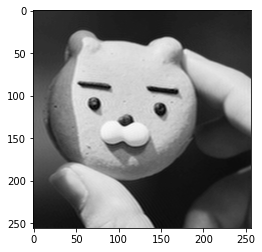

175 120 38.87761801387711 0.2373824119567871
[[  411.9881712  -1159.66260244  1416.20651973 ...    61.75102144
    -35.56687081     9.56115058]
 [-1159.66260241  3540.71046471 -4665.54964119 ...  -229.68757738
    132.30143902   -35.56687132]
 [ 1416.20651965 -4665.54964107  6715.61562208 ...   398.72284589
   -229.68758243    61.75102369]
 ...
 [   61.75101225  -229.68754324   398.72278674 ...  6715.61575276
  -4665.54977562  1416.20656741]
 [  -35.5668655    132.30141932  -229.68754829 ... -4665.54977549
   3540.71058496 -1159.66264331]
 [    9.56114915   -35.56686601    61.7510145  ...  1416.20656734
  -1159.66264329   411.9881849 ]]


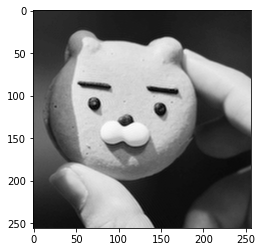

175 150 40.941049651671015 0.2300121784210205
[[  411.9881712  -1159.66260244  1416.20651973 ...    61.75102144
    -35.56687081     9.56115058]
 [-1159.66260241  3540.71046471 -4665.54964119 ...  -229.68757738
    132.30143902   -35.56687132]
 [ 1416.20651965 -4665.54964107  6715.61562208 ...   398.72284589
   -229.68758243    61.75102369]
 ...
 [   61.75101225  -229.68754324   398.72278674 ...  6715.61575276
  -4665.54977562  1416.20656741]
 [  -35.5668655    132.30141932  -229.68754829 ... -4665.54977549
   3540.71058496 -1159.66264331]
 [    9.56114915   -35.56686601    61.7510145  ...  1416.20656734
  -1159.66264329   411.9881849 ]]


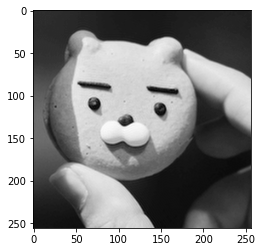

175 175 42.23679868027938 0.22100520133972168
[[  411.9881712  -1159.66260244  1416.20651973 ...    61.75102144
    -35.56687081     9.56115058]
 [-1159.66260241  3540.71046471 -4665.54964119 ...  -229.68757738
    132.30143902   -35.56687132]
 [ 1416.20651965 -4665.54964107  6715.61562208 ...   398.72284589
   -229.68758243    61.75102369]
 ...
 [   61.75101225  -229.68754324   398.72278674 ...  6715.61575276
  -4665.54977562  1416.20656741]
 [  -35.5668655    132.30141932  -229.68754829 ... -4665.54977549
   3540.71058496 -1159.66264331]
 [    9.56114915   -35.56686601    61.7510145  ...  1416.20656734
  -1159.66264329   411.9881849 ]]


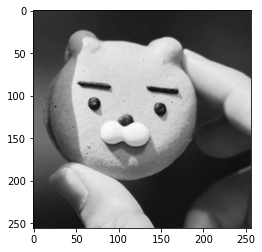

175 200 43.246555138320346 0.3317391872406006
[[ 1.17322626e+03 -4.46718792e+03  8.66190505e+03 ... -2.57402589e+02
   1.03424644e+02 -2.15562118e+01]
 [-4.46718792e+03  1.79817779e+04 -3.65072677e+04 ...  1.23494563e+03
  -4.96213395e+02  1.03424670e+02]
 [ 8.66190504e+03 -3.65072677e+04  7.75298150e+04 ... -3.07336998e+03
   1.23494605e+03 -2.57402740e+02]
 ...
 [-2.57401395e+02  1.23493991e+03 -3.07335572e+03 ...  7.75299131e+04
  -3.65073137e+04  8.66191578e+03]
 [ 1.03424164e+02 -4.96211093e+02  1.23494032e+03 ... -3.65073137e+04
   1.79817994e+04 -4.46719293e+03]
 [-2.15561118e+01  1.03424191e+02 -2.57401547e+02 ...  8.66191577e+03
  -4.46719293e+03  1.17322742e+03]]


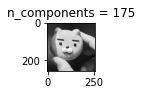

200 100 37.64006251022213 0.14493417739868164
[[ 1.17322626e+03 -4.46718792e+03  8.66190505e+03 ... -2.57402589e+02
   1.03424644e+02 -2.15562118e+01]
 [-4.46718792e+03  1.79817779e+04 -3.65072677e+04 ...  1.23494563e+03
  -4.96213395e+02  1.03424670e+02]
 [ 8.66190504e+03 -3.65072677e+04  7.75298150e+04 ... -3.07336998e+03
   1.23494605e+03 -2.57402740e+02]
 ...
 [-2.57401395e+02  1.23493991e+03 -3.07335572e+03 ...  7.75299131e+04
  -3.65073137e+04  8.66191578e+03]
 [ 1.03424164e+02 -4.96211093e+02  1.23494032e+03 ... -3.65073137e+04
   1.79817994e+04 -4.46719293e+03]
 [-2.15561118e+01  1.03424191e+02 -2.57401547e+02 ...  8.66191577e+03
  -4.46719293e+03  1.17322742e+03]]


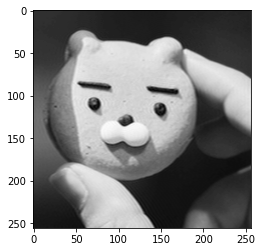

200 120 39.316231152406914 0.21999716758728027
[[ 1.17322626e+03 -4.46718792e+03  8.66190505e+03 ... -2.57402589e+02
   1.03424644e+02 -2.15562118e+01]
 [-4.46718792e+03  1.79817779e+04 -3.65072677e+04 ...  1.23494563e+03
  -4.96213395e+02  1.03424670e+02]
 [ 8.66190504e+03 -3.65072677e+04  7.75298150e+04 ... -3.07336998e+03
   1.23494605e+03 -2.57402740e+02]
 ...
 [-2.57401395e+02  1.23493991e+03 -3.07335572e+03 ...  7.75299131e+04
  -3.65073137e+04  8.66191578e+03]
 [ 1.03424164e+02 -4.96211093e+02  1.23494032e+03 ... -3.65073137e+04
   1.79817994e+04 -4.46719293e+03]
 [-2.15561118e+01  1.03424191e+02 -2.57401547e+02 ...  8.66191577e+03
  -4.46719293e+03  1.17322742e+03]]


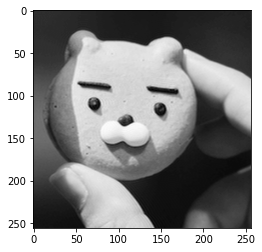

200 150 41.778123587705295 0.21199584007263184
[[ 1.17322626e+03 -4.46718792e+03  8.66190505e+03 ... -2.57402589e+02
   1.03424644e+02 -2.15562118e+01]
 [-4.46718792e+03  1.79817779e+04 -3.65072677e+04 ...  1.23494563e+03
  -4.96213395e+02  1.03424670e+02]
 [ 8.66190504e+03 -3.65072677e+04  7.75298150e+04 ... -3.07336998e+03
   1.23494605e+03 -2.57402740e+02]
 ...
 [-2.57401395e+02  1.23493991e+03 -3.07335572e+03 ...  7.75299131e+04
  -3.65073137e+04  8.66191578e+03]
 [ 1.03424164e+02 -4.96211093e+02  1.23494032e+03 ... -3.65073137e+04
   1.79817994e+04 -4.46719293e+03]
 [-2.15561118e+01  1.03424191e+02 -2.57401547e+02 ...  8.66191577e+03
  -4.46719293e+03  1.17322742e+03]]


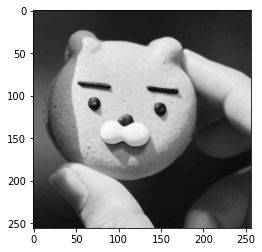

200 175 43.49973601165861 0.21898984909057617
[[ 1.17322626e+03 -4.46718792e+03  8.66190505e+03 ... -2.57402589e+02
   1.03424644e+02 -2.15562118e+01]
 [-4.46718792e+03  1.79817779e+04 -3.65072677e+04 ...  1.23494563e+03
  -4.96213395e+02  1.03424670e+02]
 [ 8.66190504e+03 -3.65072677e+04  7.75298150e+04 ... -3.07336998e+03
   1.23494605e+03 -2.57402740e+02]
 ...
 [-2.57401395e+02  1.23493991e+03 -3.07335572e+03 ...  7.75299131e+04
  -3.65073137e+04  8.66191578e+03]
 [ 1.03424164e+02 -4.96211093e+02  1.23494032e+03 ... -3.65073137e+04
   1.79817994e+04 -4.46719293e+03]
 [-2.15561118e+01  1.03424191e+02 -2.57401547e+02 ...  8.66191577e+03
  -4.46719293e+03  1.17322742e+03]]


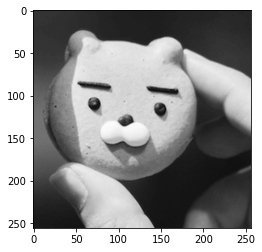

200 200 45.01377949315851 0.242997407913208


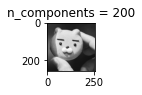

In [5]:
A_l = T.copy()
A_r = T.copy()

tic = time.time()
A_lb,U_L,V_L = Bidiagonalization(A_l)
A_rb,U_R,V_R = Bidiagonalization(A_r)
toc = time.time()
print(toc-tic)


u_l,s_l,v_l = QR_iteration(A_lb,U_L,V_L)
u_r,s_r,v_r = QR_iteration(A_rb,U_R,V_R)


for i in range(len(s_l)):
    s_l[i] = 1/s_l[i]
for i in range(len(s_r)):
    s_r[i] = 1/s_r[i]


# 以下calculating inverse
def pseudoinv(u,s,v,trun):
#     v=v.T
# 这一行在不掉包是删除
    A_t = v[:, :trun] @ np.diag(s[:trun]) @ u.T[:trun, :] 
    return A_t


def frobenius(X):
    return np.sqrt(np.trace(X.T @ X))

def PSNR(n,img,X_t):
    return 10*np.log10(n**2/(frobenius(X_t-img))**2)

comps = [100,120,150,175,200]
plt.figure(figsize=(12, 6))
blurry = T @ img @ T.T


for i in range(len(comps)):
    for j in range(len(comps)):
        tic = time.time()
        A_lt = pseudoinv(u_l,s_l,v_l,comps[i])
        A_rt = pseudoinv(u_r,s_r,v_r,comps[j])
        X_t = A_lt @ blurry @ A_rt
        toc = time.time()
        print(comps[i],comps[j],PSNR(img.shape[0],img,X_t),toc-tic)
    if(i == 0):
        plt.subplot(3, 6, i+1),
        plt.imshow(X_t, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')

    else:
        plt.subplot(3, 6, i+1),
        plt.imshow(X_t, cmap='gray'),
        plt.title(f'n_components = {comps[i]}')

        
plt.show()